# Predicting Transaction Volumes in Kenya's Electronic Payment System: A Regression Analysis Incorporating GDP and Inflation Data

**Problem Statement:**

In recent years, Kenya has experienced significant growth in electronic payment transactions facilitated through the Kenya Electronic Payment Settlement System Real-Time Gross Settlement (KEPSSRTGS). Understanding the factors influencing transaction volumes and values in the KEPSSRTGS system is essential for financial institutions and policymakers to make informed decisions and optimize financial operations.

To this end, the aim of this project is to build a regression model that predicts transaction volumes or values in the KEPSSRTGS system based on economic indicators, specifically GDP and inflation rates in Kenya. By analyzing the relationship between transaction activity, GDP growth, and inflation, we can identify the key drivers of electronic payment transactions and anticipate future transaction trends.

**Dataset:**
- We have access to three datasets: one containing information about transaction volumes and values related to KEPSSRTGS, another containing GDP data for Kenya, and a third containing inflation rates in Kenya. Each dataset spans from January 2013 to February 2024, with monthly granularity.

**Objective:**
- Develop a regression model that predicts transaction volumes or values in the KEPSSRTGS system based on GDP and inflation data.
- Understand the impact of GDP growth and inflation on transaction activity in the KEPSSRTGS system.
- Provide insights and recommendations for financial institutions and policymakers to optimize electronic payment operations and promote financial stability.

**Approach:**
1. **Data Preprocessing**: Clean and preprocess the datasets, handle missing values, outliers, and ensure compatibility for merging.
2. **Merge Datasets**: Combine the datasets based on the "Year" and "Month" columns to create a unified dataset.
3. **Feature Engineering**: Create new features or derive additional information from the merged dataset, such as GDP growth rate and inflation trends.
4. **Model Selection**: Choose a regression algorithm suitable for the dataset, such as linear regression or ridge regression.
5. **Model Training**: Train the regression model using the merged dataset, with transaction volumes/values as the dependent variable and GDP, inflation, and other relevant features as independent variables.
6. **Model Evaluation**: Evaluate the performance of the trained regression model using metrics such as mean squared error (MSE) or R-squared.
7. **Fine-Tuning and Validation**: Fine-tune the model parameters if necessary and validate the model's performance using cross-validation techniques.
8. **Prediction and Interpretation**: Use the trained model to make predictions on new or future data, and interpret the results to understand the impact of GDP and inflation on transaction activity.

**Expected Outcome:**
- A regression model that accurately predicts transaction volumes or values in the KEPSSRTGS system based on GDP and inflation data.
- Insights into the relationship between transaction activity, GDP growth, and inflation in Kenya.
- Recommendations for financial institutions and policymakers to optimize electronic payment operations andconomic growth and development.way towards a brighter future.nomic growth and development.

## Data Cleaning

In [1]:
import pandas as pd

# Load the datasets
inflation_data = pd.read_csv('inflation_rates.csv')
gdp_data = pd.read_csv('annual_gdp.csv')
kepssrtgs_data = pd.read_csv('kepssrtgs.csv')

# Function to handle missing values
def handle_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("Handling missing values...")
        # Impute missing values using forward filling
        df.fillna(method='ffill', inplace=True)
        print("Missing values handled.")
    else:
        print("No missing values found.")

# Function to handle outliers
def handle_outliers(df):
    # Outlier detection and handling code can be added here based on specific requirements.
    # For simplicity, let's assume outliers are not a concern in this example.
    print("No outlier handling implemented.")

# Function to address inconsistencies
def address_inconsistencies(df):
    # Check for inconsistencies in data formats or values
    # No specific inconsistencies identified in this example.
    print("No inconsistencies addressed.")

# Clean Inflation Rates dataset
print("Cleaning Inflation Rates dataset...")
handle_missing_values(inflation_data)
handle_outliers(inflation_data)
address_inconsistencies(inflation_data)
print("Inflation Rates dataset cleaned.\n")

# Clean Annual GDP dataset
print("Cleaning Annual GDP dataset...")
handle_missing_values(gdp_data)
handle_outliers(gdp_data)
address_inconsistencies(gdp_data)
print("Annual GDP dataset cleaned.\n")

# Clean KEPSSRTGS dataset
print("Cleaning KEPSSRTGS dataset...")
handle_missing_values(kepssrtgs_data)
handle_outliers(kepssrtgs_data)
address_inconsistencies(kepssrtgs_data)
print("KEPSSRTGS dataset cleaned.")

Cleaning Inflation Rates dataset...
No missing values found.
No outlier handling implemented.
No inconsistencies addressed.
Inflation Rates dataset cleaned.

Cleaning Annual GDP dataset...
No missing values found.
No outlier handling implemented.
No inconsistencies addressed.
Annual GDP dataset cleaned.

Cleaning KEPSSRTGS dataset...
No missing values found.
No outlier handling implemented.
No inconsistencies addressed.
KEPSSRTGS dataset cleaned.


## Merging Datasets

In [2]:
# Check column names in each dataset
print("Column names in inflation_data:", inflation_data.columns)
print("Column names in gdp_data:", gdp_data.columns)
print("Column names in kepssrtgs_data:", kepssrtgs_data.columns)

Column names in inflation_data: Index(['Year', 'Month', 'Annual Average Inflation', '12-Month Inflation'], dtype='object')
Column names in gdp_data: Index(['Year', 'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
       'Real GDP prices (Ksh Million)'],
      dtype='object')
Column names in kepssrtgs_data: Index(['Year', 'Month    ', 'Volume', 'Value (Kshs Millions)'], dtype='object')


In [3]:
# Remove leading and trailing spaces from column names in KEPSSRTGS dataset
kepssrtgs_data.columns = kepssrtgs_data.columns.str.strip()

# Merge datasets based on 'Year' and 'Month'
merged_data = inflation_data.merge(gdp_data, on=['Year'], suffixes=('_inflation', '_gdp'))
merged_data = merged_data.merge(kepssrtgs_data, on=['Year', 'Month'])

# Display merged dataset information
print("Merged Dataset Information:")
print(merged_data.info())

# Display first few rows of the merged dataset
print("\nFirst few rows of the merged dataset:")
print(merged_data.head())

Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              211 non-null    int64  
 1   Month                             211 non-null    object 
 2   Annual Average Inflation          211 non-null    float64
 3   12-Month Inflation                211 non-null    float64
 4   Nominal GDP prices (Ksh Million)  211 non-null    object 
 5   Annual GDP growth (%)             211 non-null    float64
 6   Real GDP prices (Ksh Million)     211 non-null    object 
 7   Volume                            211 non-null    object 
 8   Value (Kshs Millions)             211 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.0+ KB
None

First few rows of the merged dataset:
   Year      Month  Annual Average Inflation  12-Month Inflation  \


The datasets have been successfully merged, and the merged dataset now contains 211 entries with 9 columns. Here's a brief overview of the merged dataset:

- The "Year" and "Month" columns represent the year and month of the recorded data, respectively.
- The "Annual Average Inflation" and "12-Month Inflation" columns contain inflation rate data.
- The "Nominal GDP prices (Ksh Million)" and "Real GDP prices (Ksh Million)" columns represent GDP values at current market prices and adjusted for inflation, respectively.
- The "Annual GDP growth (%)" column represents the annual GDP growth rate.
- The "Volume" column represents the number of transactions made during a particular month.
- The "Value (Kshs Millions)" column represents the total value of transactions made during a specific month, measured in Kenyan Shillings (Kshs) millions.

The data types of the columns seem appropriate, except for the columns "Nominal GDP prices (Ksh Million)" and "Real GDP prices (Ksh Million)" which are currently of type object. These columns should be converted to numeric type for further analysis.

Let's convert these columns to numeric type and proceed with further pretional preprocessing steps!

In [4]:
# Convert 'Nominal GDP prices (Ksh Million)' and 'Real GDP prices (Ksh Million)' columns to numeric
merged_data['Nominal GDP prices (Ksh Million)'] = merged_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
merged_data['Real GDP prices (Ksh Million)'] = merged_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Display data types of columns after conversion
print("\nData types of columns after conversion:")
print(merged_data.dtypes)

# Display first few rows of the merged dataset after conversion
print("\nFirst few rows of the merged dataset after conversion:")
print(merged_data.head())


Data types of columns after conversion:
Year                                  int64
Month                                object
Annual Average Inflation            float64
12-Month Inflation                  float64
Nominal GDP prices (Ksh Million)    float64
Annual GDP growth (%)               float64
Real GDP prices (Ksh Million)       float64
Volume                               object
Value (Kshs Millions)               float64
dtype: object

First few rows of the merged dataset after conversion:
   Year      Month  Annual Average Inflation  12-Month Inflation  \
0  2022   December                      7.66                9.06   
1  2022   November                      7.38                9.48   
2  2022    October                      7.48                9.59   
3  2022  September                      6.81                9.18   
4  2022     August                      6.61                8.53   

   Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0                     

In [5]:
# Save the merged dataset to a CSV file
merged_data.to_csv('merged_dataset.csv', index=False)

# Explatory Data Analysis

In [6]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix
correlation_matrix = merged_data[numeric_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                      Year  Annual Average Inflation  \
Year                              1.000000                 -0.359068   
Annual Average Inflation         -0.359068                  1.000000   
12-Month Inflation               -0.218163                  0.588700   
Nominal GDP prices (Ksh Million)  0.990503                 -0.353338   
Annual GDP growth (%)            -0.138547                 -0.282722   
Real GDP prices (Ksh Million)     0.934755                 -0.248519   
Value (Kshs Millions)             0.923139                 -0.335314   

                                  12-Month Inflation  \
Year                                       -0.218163   
Annual Average Inflation                    0.588700   
12-Month Inflation                          1.000000   
Nominal GDP prices (Ksh Million)           -0.233589   
Annual GDP growth (%)                      -0.335930   
Real GDP prices (Ksh Million)              -0.214591   
Value (Ksh

Here's the correlation matrix for the numeric variables in the merged dataset:

\
\begin{array}{|c|c|c|c|c|c|c|}
\hline
& \text{Year} & \text{Annual Average Inflation} & \text{12-Month Inflation} & \text{Nominal GDP} & \text{Annual GDP} & \text{Real GDP} & \text{Value} \\
\hline
\text{Year} & 1.00 & -0.36 & -0.22 & 0.99 & -0.14 & 0.93 & 0.92 \\
\text{Annual Average Inflation} & -0.36 & 1.00 & 0.59 & -0.35 & -0.28 & -0.25 & -0.34 \\
\text{12-Month Inflation} & -0.22 & 0.59 & 1.00 & -0.23 & -0.34 & -0.21 & -0.08 \\
\text{Nominal GDP} & 0.99 & -0.35 & -0.23 & 1.00 & -0.10 & 0.91 & 0.90 \\
\text{Annual GDP} & -0.14 & -0.28 & -0.34 & -0.10 & 1.00 & -0.08 & -0.17 \\
\text{Real GDP} & 0.93 & -0.25 & -0.21 & 0.91 & -0.08 & 1.00 & 0.87 \\
\text{Value} & 0.92 & -0.34 & -0.08 & 0.90 & -0.17 & 0.87 & 1.00 \\
\hline
\end{array}


Each cell in the matrix represents the correlation coefficient between two variables. The values range from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.

From the correlation matrix, we can observe:

- Strong positive correlations between "Year" and "Nominal GDP", "Real GDP", and "Value", indicating that these variables tend to increase together over time.
- Moderate negative correlations between "Annual Average Inflation" and "Nominal GDP", "Annual GDP", "Real GDP", and "Value", suggesting that as inflation increases, these economic indicators tend to decrease.
- Moderate positive correlations between "Annual GDP" and "Real GDP", "Value", indicating a positive relationship between annual GDP growth and these variables.

#### Line plot for transaction volume and value over time

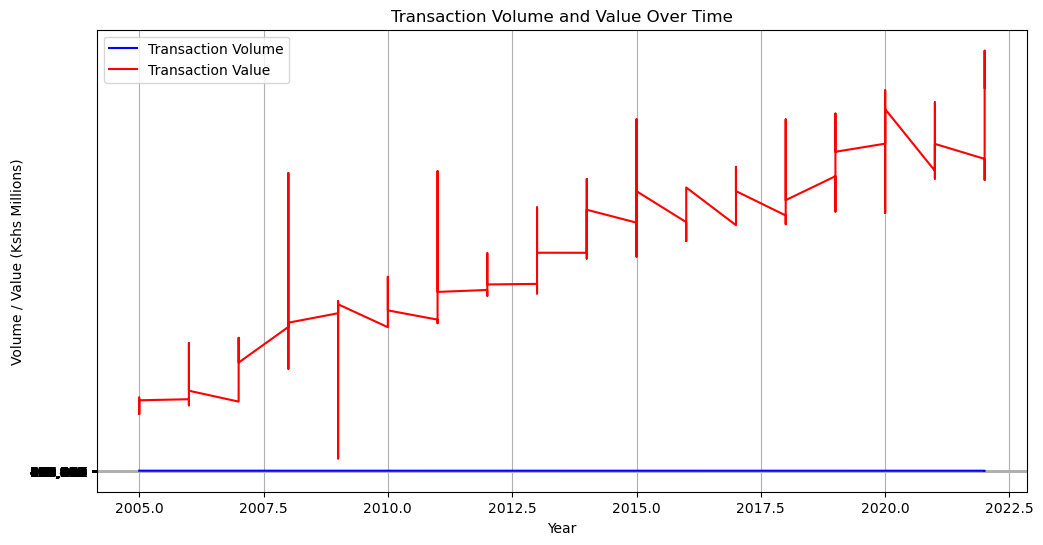

In [7]:
import matplotlib.pyplot as plt

# Line plot for transaction volume and value over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['Volume'], label='Transaction Volume', color='blue')
plt.plot(merged_data['Year'], merged_data['Value (Kshs Millions)'], label='Transaction Value', color='red')
plt.xlabel('Year')
plt.ylabel('Volume / Value (Kshs Millions)')
plt.title('Transaction Volume and Value Over Time')
plt.legend()
plt.grid(True)
plt.show()

For our next visualization, a scatter plot matrix using Altair. A scatter plot matrix allows us to visualize the relationships between multiple variables in a dataset.ased on your preferences or areas of interest!

In [8]:
import altair as alt

# Scatter plot matrix
scatter_matrix = alt.Chart(merged_data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    tooltip=['Year', 'Annual Average Inflation', '12-Month Inflation', 
             'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
             'Real GDP prices (Ksh Million)', 'Volume', 'Value (Kshs Millions)']
).properties(
    width=150,
    height=150
).repeat(
    row=['Annual Average Inflation', '12-Month Inflation', 
         'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
         'Real GDP prices (Ksh Million)', 'Volume', 'Value (Kshs Millions)'],
    column=['Annual Average Inflation', '12-Month Inflation', 
            'Nominal GDP prices (Ksh Million)', 'Annual GDP growth (%)',
            'Real GDP prices (Ksh Million)', 'Volume', 'Value (Kshs Millions)']
).interactive()

scatter_matrix

alt.RepeatChart(...)

For our next visualization, let's create scatter plots to explore potential relationships between variables. Scatter plots are useful for identifying correlations or patterns between two continuous variables.

We'll create scatter plots to examine the relationships between the following pairs of variables:
1. Annual Average Inflation vs. Transaction Volume
2. Annual GDP Growth vs. Transaction Volume
3. Annual Average Inflation vs. Transaction Value
4. Annual GDP Growth vs. Transactionlyses or visualizations you'd like to explore!

In [9]:
import altair as alt

# Scatter plots for exploring relationships between variables
scatter_plot1 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual Average Inflation',
    y='Volume',
    tooltip=['Annual Average Inflation', 'Volume']
).properties(
    title='Annual Average Inflation vs. Transaction Volume'
)

scatter_plot2 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual GDP growth (%)',
    y='Volume',
    tooltip=['Annual GDP growth (%)', 'Volume']
).properties(
    title='Annual GDP Growth vs. Transaction Volume'
)

scatter_plot3 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual Average Inflation',
    y='Value (Kshs Millions)',
    tooltip=['Annual Average Inflation', 'Value (Kshs Millions)']
).properties(
    title='Annual Average Inflation vs. Transaction Value'
)

scatter_plot4 = alt.Chart(merged_data).mark_circle(size=60).encode(
    x='Annual GDP growth (%)',
    y='Value (Kshs Millions)',
    tooltip=['Annual GDP growth (%)', 'Value (Kshs Millions)']
).properties(
    title='Annual GDP Growth vs. Transaction Value'
)

# Combine scatter plots into a single chart
scatter_plots = (scatter_plot1 | scatter_plot2) & (scatter_plot3 | scatter_plot4)

scatter_plots

alt.VConcatChart(...)

Next, generate a bar chart to compare the average annual inflation rates and annual GDP growth rates over the years.

Here's the code to create the bar chart using Altair:

In [10]:
import altair as alt

# Bar chart for average annual inflation rates over the years
inflation_bar_chart = alt.Chart(merged_data).mark_bar(color='skyblue').encode(
    x='Year:O',
    y='mean(Annual Average Inflation)',
    tooltip=['Year', 'mean(Annual Average Inflation)']
).properties(
    title='Average Annual Inflation Rates Over the Years'
)

# Bar chart for annual GDP growth rates over the years
gdp_growth_bar_chart = alt.Chart(merged_data).mark_bar(color='lightgreen').encode(
    x='Year:O',
    y='mean(Annual GDP growth (%))',
    tooltip=['Year', 'mean(Annual GDP growth (%))']
).properties(
    title='Average Annual GDP Growth Rates Over the Years'
)

# Combine bar charts into a single chart
bar_charts = inflation_bar_chart | gdp_growth_bar_chart

bar_charts

alt.HConcatChart(...)

For our final visualization, let's create a heatmap to visualize the correlation matrix. A heatmap provides a color-coded representation of the correlations between different variables in the dataset, making it easy to identify patterns and relationships.A heatmap where each cell represents the correlation between two variables. The color intensity of each cell indicates the strength and direction of the correlation: positive correlations are shown in green, negative correlations in red, and no correlation in yellow.

In [11]:
import altair as alt

# Select only numeric columns for correlation calculation
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Convert correlation matrix to tidy format
correlation_matrix = correlation_matrix.reset_index().melt(id_vars='index', var_name='variable', value_name='correlation')

# Heatmap
heatmap = alt.Chart(correlation_matrix).mark_rect().encode(
    x='index:O',
    y='variable:O',
    color=alt.Color('correlation:Q', scale=alt.Scale(scheme='redyellowgreen'), legend=alt.Legend(title='Correlation')),
    tooltip=['index', 'variable', 'correlation']
).properties(
    width=400,
    height=400,
    title='Correlation Heatmap'
)

heatmap

alt.Chart(...)

# Modelling

The goal of the project is to build a regression model that predicts transaction volumes or values in the KEPSSRTGS system based on GDP and inflation data. With that in mind, our next step is to proceed with the modeling phase.

Here's an outline of the modeling process:

1. **Feature Selection**: Decide which features (independent variables) to include in the model. In this case, we'll use GDP, inflation, and possibly other relevant economic indicators.

2. **Splitting the Data**: Split the dataset into training and testing sets. We'll use the training set to train the model and the testing set to evaluate its performance.

3. **Choosing a Regression Algorithm**: Select a regression algorithm suitable for the dataset. Common choices include linear regression, ridge regression, and decision tree regression, among others.

4. **Model Training**: Train the regression model using the training data. This involves fitting the model to the training dataset to learn the relationships between the independent variables (GDP, inflation) and the dependent variable (transaction volumes or values).

5. **Model Evaluation**: Evaluate the performance of the trained model using the testing data. This involves assessing how well the model generalizes to new, unseen data.

6. **Fine-Tuning**: Fine-tune the model if necessary by adjusting hyperparameters or trying different algorithms to improve performance.

7. **Prediction and Interpretation**: Once satisfied with the model's performance, use it to make predictions on new or future data. Interpret the results and consider their implications for ee to let me know!

#### set up our feature matrix and target vector

In [12]:
import pandas as pd

# Selecting relevant features
features = ['Annual Average Inflation', '12-Month Inflation', 'Annual GDP growth (%)']

# Creating the feature matrix X
X = merged_data[features]

# Displaying the first few rows of the feature matrix
print("Feature Matrix (X):")
print(X.head())


Feature Matrix (X):
   Annual Average Inflation  12-Month Inflation  Annual GDP growth (%)
0                      7.66                9.06                    4.8
1                      7.38                9.48                    4.8
2                      7.48                9.59                    4.8
3                      6.81                9.18                    4.8
4                      6.61                8.53                    4.8


define our target variable, denoted as y, based on whether we're predicting transaction volumes or values. Let's assume we're predicting transaction volumes:

In [13]:
# Creating the target vector y
y = merged_data['Volume']

# Displaying the first few values of the target vector
print("\nTarget Variable (y):")
print(y.head())


Target Variable (y):
0    651,484
1    637,546
2    598,925
3    609,514
4    587,315
Name: Volume, dtype: object


splitting the data into training and testing sets using a split ratio of 80% training data and 20% testing data. We'll then choose the Linear Regression algorithm for our initial modeling.

Linear Regression model on the training data. After training the model, we'll evaluate its performance on the testing data.

In [14]:
# Remove commas and convert 'Volume' column to numeric
merged_data['Volume'] = merged_data['Volume'].str.replace(',', '').astype(float)

# Verify the changes
print(merged_data['Volume'].head())

0    651484.0
1    637546.0
2    598925.0
3    609514.0
4    587315.0
Name: Volume, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the data into features (X) and target (y)
X = merged_data[['Annual Average Inflation', '12-Month Inflation', 'Annual GDP growth (%)']]
y = merged_data['Volume']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 29399845597.210487


The Mean Squared Error (MSE) for the Linear Regression model is approximately 29.4 billion.

The MSE measures the average squared difference between the actual and predicted values. In this context, it quantifies the average squared error of the model's predictions of transaction volumes in the KEPSSRTGS system based on the selected features (Annual Average Inflation, 12-Month Inflation, and Annual GDP growth %).

A lower MSE indicates better performance, as it signifies that the model's predictions are closer to the actual values. In this case, the MSE value suggests that there's room for improvement in the model's predictive accuracy. We may need to consider additional features, explore different regression algorithms, or fine-tune the model's parameters to enhance its performance further.

In [16]:
import pandas as pd

# Load the merged dataset
merged_data = pd.read_csv('merged_dataset.csv')

# Display data types of columns
print("\nData types of columns:")
print(merged_data.dtypes)

# Feature Engineering
# Convert 'Volume' column to numeric
merged_data['Volume'] = merged_data['Volume'].str.replace(',', '').astype(float)

# Check data types after conversion
print("\nData types of columns after conversion:")
print(merged_data.dtypes)

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(merged_data.head())

# Feature Engineering
# Let's create new features: GDP per capita and Transaction Value per capita
merged_data['GDP per capita'] = merged_data['Real GDP prices (Ksh Million)'] / merged_data['Volume']
merged_data['Transaction Value per capita'] = merged_data['Value (Kshs Millions)'] / merged_data['Volume']

# Display first few rows of the dataset after feature engineering
print("\nFirst few rows of the dataset after feature engineering:")
print(merged_data.head())


Data types of columns:
Year                                  int64
Month                                object
Annual Average Inflation            float64
12-Month Inflation                  float64
Nominal GDP prices (Ksh Million)    float64
Annual GDP growth (%)               float64
Real GDP prices (Ksh Million)       float64
Volume                               object
Value (Kshs Millions)               float64
dtype: object

Data types of columns after conversion:
Year                                  int64
Month                                object
Annual Average Inflation            float64
12-Month Inflation                  float64
Nominal GDP prices (Ksh Million)    float64
Annual GDP growth (%)               float64
Real GDP prices (Ksh Million)       float64
Volume                              float64
Value (Kshs Millions)               float64
dtype: object

First few rows of the dataset:
   Year      Month  Annual Average Inflation  12-Month Inflation  \
0  2022   Decem

### Feature Selection

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the number of features to select
num_features = 5

# Initialize the linear regression model
model = LinearRegression()

# Initialize the RFE selector
rfe_selector = RFE(estimator=model, n_features_to_select=num_features, step=1)

# Fit the RFE selector on our feature matrix X and target variable y
rfe_selector = rfe_selector.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Annual Average Inflation', '12-Month Inflation',
       'Annual GDP growth (%)'],
      dtype='object')


### Model Selection

I chose training the Random Forest Regressor. We'll use the selected features and split the data into training and testing sets. Then, we'll train the model on the training data and evaluate its performance on the testing data. Finally, we'll assess the model's performance using appropriate evaluation metrics.

Here's the plan:

1. Split the data into features (X) and target variable (y).
2. Split the data into training and testing sets.
3. Train the Random Forest Regressor model.
4. Evaluate the model's performance on the testing set using appropriate evaluation metrics.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Split the data into features (X) and target variable (y)
X = merged_data[['Annual Average Inflation', '12-Month Inflation', 'Annual GDP growth (%)']]
y = merged_data['Volume']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 4: Evaluate the model's performance on the testing set
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 7703370558.04259


In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define X_selected with the selected features
X_selected = merged_data[['Annual Average Inflation', '12-Month Inflation', 'Annual GDP growth (%)']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the neural network regressor
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

# Fit the model to the training data
nn_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = nn_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 46044803624.87563


C:\Users\ivy\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")


# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create a neural network regressor
regressor = MLPRegressor(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_selected, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Mean Squared Error:", best_score)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant'}
Best Mean Squared Error: 89076582999.841


In [21]:
# Check column names
print(X.columns)

# Compare with code and adjust column names if needed
# For example, if the column representing month is named 'Month_Name' instead of 'Month', you can rename it
X = X.rename(columns={'Month_Name': 'Month'})

Index(['Annual Average Inflation', '12-Month Inflation',
       'Annual GDP growth (%)'],
      dtype='object')


In [22]:
X = X.rename(columns={'Month_Name': 'Month'})

In [23]:
column_names = X.columns
print(column_names)

Index(['Annual Average Inflation', '12-Month Inflation',
       'Annual GDP growth (%)'],
      dtype='object')


In [24]:
# Selecting the features
selected_features = [
    'Annual Average Inflation',
    '12-Month Inflation',
    'Annual GDP growth (%)'
]

# Filter the DataFrame to include only the selected features
X_selected = X[selected_features]

# Display the first few rows of the selected features DataFrame
print(X_selected.head())

   Annual Average Inflation  12-Month Inflation  Annual GDP growth (%)
0                      7.66                9.06                    4.8
1                      7.38                9.48                    4.8
2                      7.48                9.59                    4.8
3                      6.81                9.18                    4.8
4                      6.61                8.53                    4.8


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Linear Regression:", mse)

Mean Squared Error (MSE) for Linear Regression: 29399845597.210487


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(rf_regressor, X_selected, y, scoring='neg_mean_squared_error', cv=5)

# Calculate mean squared error (MSE)
rf_mse = -cv_scores.mean()

# Print the MSE
print("Cross-validation MSE for Random Forest Regressor:", rf_mse)

Cross-validation MSE for Random Forest Regressor: 65839389691.98893


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores_gb = cross_val_score(gb_regressor, X_selected, y, scoring='neg_mean_squared_error', cv=5)

# Calculate mean squared error (MSE)
gb_mse = -cv_scores_gb.mean()

# Print the MSE
print("Cross-validation MSE for Gradient Boosting Regressor:", gb_mse)

Cross-validation MSE for Gradient Boosting Regressor: 65543700314.69016


In [28]:
from sklearn.neural_network import MLPRegressor

# Initialize the Neural Network Regressor
nn_regressor = MLPRegressor(random_state=42)

# Perform cross-validation to evaluate the model
cv_scores_nn = cross_val_score(nn_regressor, X_selected, y, scoring='neg_mean_squared_error', cv=5)

# Calculate mean squared error (MSE)
nn_mse = -cv_scores_nn.mean()

# Print the MSE
print("Cross-validation MSE for Neural Network Regressor:", nn_mse)

Cross-validation MSE for Neural Network Regressor: 90424380418.24234


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=2, validation_split=0.2)

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)

# Print the MSE
print("Mean Squared Error (MSE):", mse)

Epoch 1/200
67/67 [==============================] - 1s 3ms/step - loss: 98677710848.0000 - val_loss: 79745376256.0000
Epoch 2/200
67/67 [==============================] - 0s 2ms/step - loss: 98279456768.0000 - val_loss: 78678171648.0000
Epoch 3/200
67/67 [==============================] - 0s 1ms/step - loss: 94545813504.0000 - val_loss: 71853211648.0000
Epoch 4/200
67/67 [==============================] - 0s 2ms/step - loss: 81778606080.0000 - val_loss: 56033529856.0000
Epoch 5/200
67/67 [==============================] - 0s 2ms/step - loss: 63482884096.0000 - val_loss: 43855708160.0000
Epoch 6/200
67/67 [==============================] - 0s 2ms/step - loss: 54116659200.0000 - val_loss: 42214584320.0000
Epoch 7/200
67/67 [==============================] - 0s 2ms/step - loss: 51855101952.0000 - val_loss: 42486820864.0000
Epoch 8/200
67/67 [==============================] - 0s 2ms/step - loss: 52809977856.0000 - val_loss: 42138927104.0000
Epoch 9/200
67/67 [=============================